In [2]:
                                                                                                                    # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


In [3]:
from sklearn.model_selection import train_test_split

train_df = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')
train_df.head()

X = train_df.drop('Crime_Category', axis = 'columns')
y = train_df['Crime_Category']

y.head()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.preprocessing import LabelEncoder

from sklearn.dummy import DummyClassifier

model = DummyClassifier(strategy = 'most_frequent')
model.fit(X_train, y_train)

model.predict(X_val.iloc[0 : 1])

X_val.iloc[0:1]

sample = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv')
sample.head()

X_test = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')
X_test.head()

y_pred = model.predict(X_test)

X_test.shape

submission = pd.DataFrame({"ID": np.arange(1, 5001),
                             "Crime_Category": y_pred,
                          }
                         )
submission.to_csv('submission.csv', index=False)

Absolutely, here's the Table of Contents in a unique style:

---

## 🌟 Table of Contents 🌟

### 📘 1. Library Import
   🔍 [Explore Now](#1)

### 📂 2. Data Loading
   🚀 [Start Here](#2)

### 🔍 3. Exploratory Data Analysis (EDA)
   🔗 [Dive In](#3)

### 📊 4. Data Visualization
   🎨 [Visualize](#4)

### 🧹 5. Null Values Treatment
   🧽 [Clean Up](#5)

### ✂️ 6. Train-Test Split
   ✨ [Split Data](#6)

### 🛠️ 7. Feature Engineering
   🔧 [Engineer Features](#7)

### 🔄 8. Preprocessing
   ⚙️ [Preprocess](#8)

### 🤖 9. Model Training
   📈 [Train Model](#9)


## **Libraries:-**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest ,chi2 , mutual_info_regression, f_regression,f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
import re, string
import html
from wordcloud import WordCloud
from shapely.geometry import Point
from geopandas import GeoDataFrame
import geopandas as gpd
from sklearn.decomposition import PCA
from bayes_opt import BayesianOptimization
from skopt  import BayesSearchCV 
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
import time
from sklearn.model_selection import GridSearchCV
import sys
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score,accuracy_score,confusion_matrix, classification_report,roc_curve,ConfusionMatrixDisplay
import shap
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from catboost import CatBoostClassifier

In [5]:
train = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
test = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")
submission = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv")

<a id='h2'></a>
# Exploratory Data Analysis (EDA)


**Exploratory Data Analysis (EDA)** is an approach to analyzing data sets to summarize their main characteristics, often using visual methods. EDA is crucial in the data analysis process as it helps to understand the data better, identify patterns, detect anomalies, and formulate hypotheses.

 **Why We Need It**: Helps to understand the underlying structure of the data, identify patterns, 
spot anomalies, and check assumptions before applying modeling techniques. 

# Shape

In [6]:
print(f"Train shape : {train.shape}")
print(f"Test shape : {test.shape}")

Train shape : (20000, 22)
Test shape : (5000, 21)


# Head

In [7]:
train.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [8]:
test.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,...,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,...,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,...,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,...,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,...,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other


# Data Type Information

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

### Insights
`Latitude and Longitude` are float types
`Location` is a string type
`Area_Id` is a float type
`Area_Name` is a string type

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               5000 non-null   object 
 1   Cross_Street           810 non-null    object 
 2   Latitude               5000 non-null   float64
 3   Longitude              5000 non-null   float64
 4   Date_Reported          5000 non-null   object 
 5   Date_Occurred          5000 non-null   object 
 6   Time_Occurred          5000 non-null   float64
 7   Area_ID                5000 non-null   float64
 8   Area_Name              5000 non-null   object 
 9   Reporting_District_no  5000 non-null   float64
 10  Part 1-2               5000 non-null   float64
 11  Modus_Operandi         4316 non-null   object 
 12  Victim_Age             5000 non-null   float64
 13  Victim_Sex             4357 non-null   object 
 14  Victim_Descent         4357 non-null   object 
 15  Prem

# Statistics of Train and Test Data

In [11]:
train.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


In [12]:
test.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,1847.000000
mean,33.957169,-117.952663,1337.737400,10.736600,1119.879800,1.414000,30.592000,300.858800,364.014077
std,1.986742,6.890957,663.922202,6.051524,605.143645,0.492598,21.897905,212.253742,119.489932
min,0.000000,-118.650300,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.010800,-118.431200,900.000000,6.000000,628.000000,1.000000,14.000000,101.000000,309.000000
50%,34.058000,-118.323200,1430.000000,11.000000,1138.000000,1.000000,31.000000,203.000000,400.000000
75%,34.162250,-118.274600,1900.000000,16.000000,1622.250000,2.000000,46.000000,501.000000,400.000000
max,34.327500,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,957.000000,516.000000


# Percentage of Null Values in the Dataset

In [13]:
train.isna().sum()/len(train)*100

Location                  0.000
Cross_Street             82.760
Latitude                  0.000
Longitude                 0.000
Date_Reported             0.000
Date_Occurred             0.000
Time_Occurred             0.000
Area_ID                   0.000
Area_Name                 0.000
Reporting_District_no     0.000
Part 1-2                  0.000
Modus_Operandi           13.705
Victim_Age                0.000
Victim_Sex               13.120
Victim_Descent           13.120
Premise_Code              0.000
Premise_Description       0.025
Weapon_Used_Code         63.325
Weapon_Description       63.325
Status                    0.000
Status_Description        0.000
Crime_Category            0.000
dtype: float64

In [14]:
test.isna().sum()/len(train)*100

Location                  0.000
Cross_Street             20.950
Latitude                  0.000
Longitude                 0.000
Date_Reported             0.000
Date_Occurred             0.000
Time_Occurred             0.000
Area_ID                   0.000
Area_Name                 0.000
Reporting_District_no     0.000
Part 1-2                  0.000
Modus_Operandi            3.420
Victim_Age                0.000
Victim_Sex                3.215
Victim_Descent            3.215
Premise_Code              0.000
Premise_Description       0.005
Weapon_Used_Code         15.765
Weapon_Description       15.765
Status                    0.000
Status_Description        0.000
dtype: float64

# Data Imblance and Distribution of Target Label

In [15]:
train['Crime_Category'].nunique()

6

In [16]:
train['Crime_Category'].unique()

array(['Property Crimes', 'Violent Crimes', 'Other Crimes',
       'Crimes against Public Order', 'Fraud and White-Collar Crimes',
       'Crimes against Persons'], dtype=object)

In [17]:
train['Crime_Category'].value_counts()/len(train)*100

Crime_Category
Property Crimes                  58.330
Violent Crimes                   23.835
Crimes against Public Order       9.040
Fraud and White-Collar Crimes     6.775
Crimes against Persons            1.125
Other Crimes                      0.895
Name: count, dtype: float64

In [18]:
dict(train['Crime_Category'].value_counts().items()).values()

dict_values([11666, 4767, 1808, 1355, 225, 179])

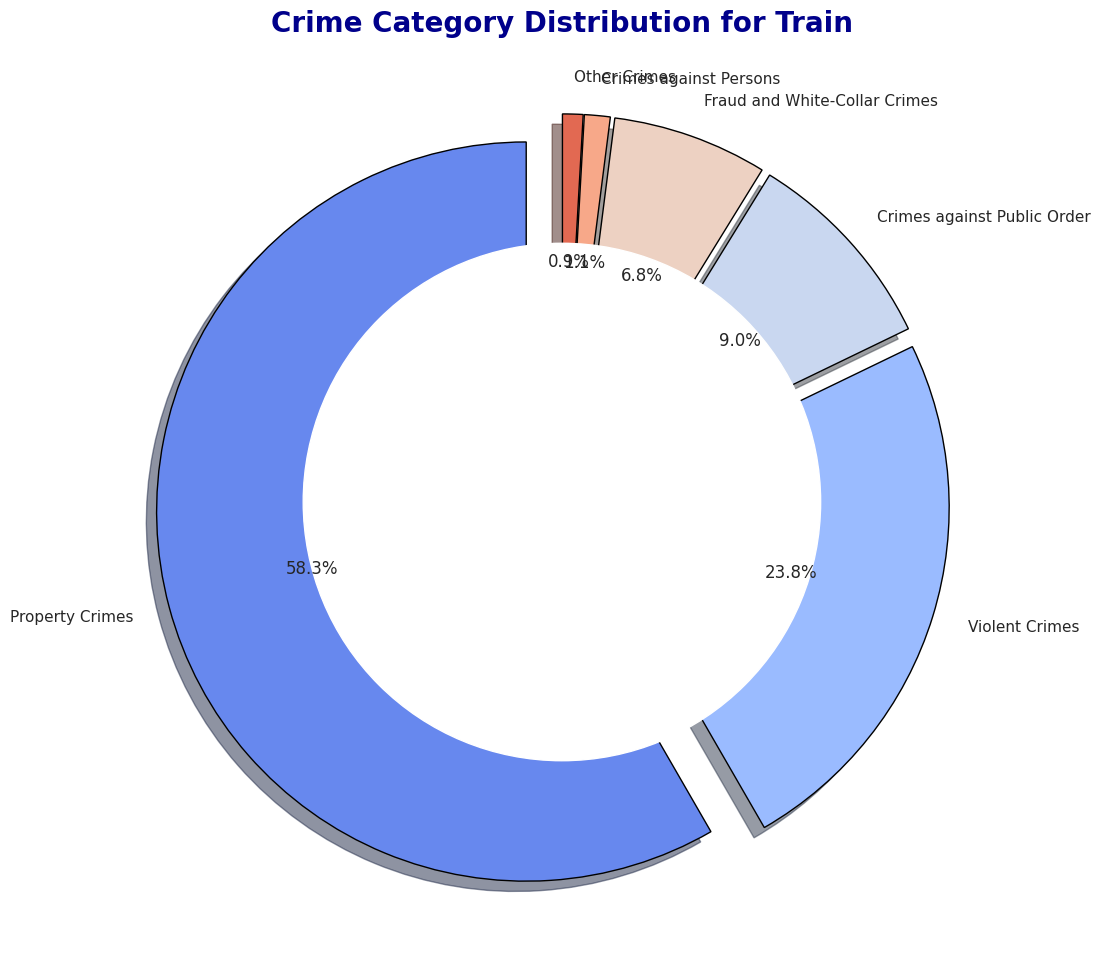

In [19]:
crime_category_train = train['Crime_Category'].value_counts().index
crime_count_train = train['Crime_Category'].value_counts().values

sns.set(style="darkgrid")

colors = sns.color_palette('coolwarm', len(crime_category_train))

plt.figure(figsize=(12, 12))

explode = [0.1 if i == max(crime_count_train) else 0.05 for i in crime_count_train]

plt.pie(crime_count_train, labels=crime_category_train, autopct='%1.1f%%', startangle=90, 
        colors=colors, explode=explode, shadow=True, wedgeprops={'edgecolor': 'black'})

plt.title('Crime Category Distribution for Train', fontsize=20, fontweight='bold', color='darkblue')

centre_circle = plt.Circle((0, 0), 0.70, fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

### Insights


### 🏠 Property Crimes
- **58.3%**
- Theft, Burglary, Vandalism

### 🔪 Violent Crimes
- **23.8%**
- Assault, Robbery, Homicide

### 🚓 Public Order Crimes
- **9.0%**
- Public peace disturbances

### 💼 Fraud & White-Collar Crimes
- **6.8%**
- Scams, Embezzlement, Financial fraud

### 👤 Crimes Against Persons
- **1.1%**
- Kidnapping, Stalking

### ⚖️ Other Crimes
- **0.9%**
- Miscellaneous    

# Data Imbalance


### ⚖️ **Overview**

#### 🚨 Dominant Crimes
- **Property Crimes** and **Violent Crimes**
  - **Majority Share**: These two categories overwhelmingly dominate the dataset.

#### 📉 Rare Crimes
- **Crimes Against Persons** and **Other Crimes**
  - **Minority Share**: These categories are scarcely represented.

#### 🎯 Impact on Predictive Models
- **Performance Concerns**: Imbalanced data can skew model accuracy.
- **Sensitivity Issues**: Predictive models may struggle with underrepresented classes.

## Label Encoder

In [20]:
label_e = LabelEncoder()
train['Crime_Category'] = label_e.fit_transform(train['Crime_Category'])

# Data Correlation

In [21]:
corr1 = train.corr(numeric_only=True)
corr1

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code,Crime_Category
Latitude,1.000000,-0.998910,0.005952,0.018411,0.017928,-0.036357,0.003195,-0.011293,-0.017656,0.021179
Longitude,-0.998910,1.000000,-0.005361,-0.006480,-0.006139,0.036373,-0.002252,0.011205,0.019185,-0.021645
Time_Occurred,0.005952,-0.005361,1.000000,0.012346,0.012127,-0.028881,-0.017798,-0.057534,-0.016911,0.040296
Area_ID,0.018411,-0.006480,0.012346,1.000000,0.999024,-0.002518,0.028966,0.004045,-0.027243,-0.011417
Reporting_District_no,0.017928,-0.006139,0.012127,0.999024,1.000000,-0.002108,0.028721,0.004121,-0.027117,-0.011914
Part 1-2,-0.036357,0.036373,-0.028881,-0.002518,-0.002108,1.000000,0.186780,0.254579,0.419642,-0.257909
Victim_Age,0.003195,-0.002252,-0.017798,0.028966,0.028721,0.186780,1.000000,0.191313,0.056768,-0.030696
Premise_Code,-0.011293,0.011205,-0.057534,0.004045,0.004121,0.254579,0.191313,1.000000,0.196771,-0.174398
Weapon_Used_Code,-0.017656,0.019185,-0.016911,-0.027243,-0.027117,0.419642,0.056768,0.196771,1.000000,0.022266
Crime_Category,0.021179,-0.021645,0.040296,-0.011417,-0.011914,-0.257909,-0.030696,-0.174398,0.022266,1.000000


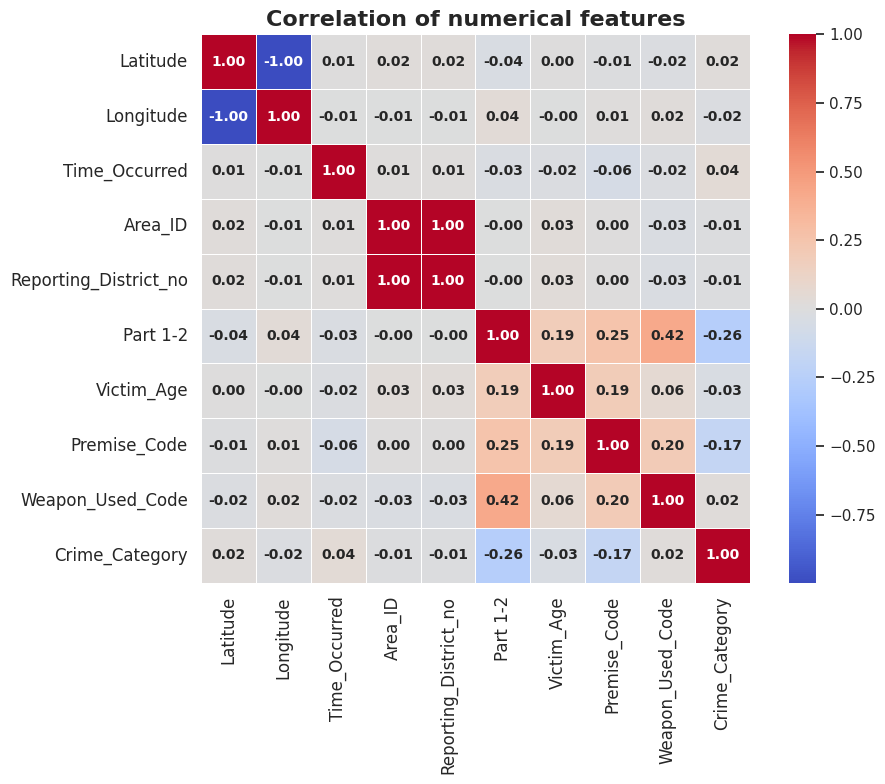

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr1, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True,
            linewidths=.5, annot_kws={'size': 10, 'weight': 'bold'})
plt.title('Correlation of numerical features', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Insights

#### 1. **Visualization of Relationships**:
   - The heatmap provides a visual representation of the correlation matrix (`corr1`), allowing us to quickly identify the strength and direction of relationships between numerical features.

#### 2. **Color-Coded Correlations**:
   - The `coolwarm` color palette differentiates positive (red) from negative (blue) correlations, with the intensity of the color indicating the magnitude of the correlation.

#### 3. **Annotations**:
   - Each cell is annotated with the correlation value formatted to two decimal places (`fmt='.2f'`). This provides precise information about the correlation coefficients.

#### 4. **Clear Layout and Readability**:
   - The figure size (`figsize=(10, 8)`) and the tight layout (`plt.tight_layout()`) ensure that all elements are well-spaced and readable.
   - The titles and axis labels are set with specific font sizes (`fontsize=16` for the title and `fontsize=12` for the ticks), enhancing readability.

#### 5. **Correlation Patterns**:
   - Strong correlations (either positive or negative) can indicate potential multicollinearity issues in the dataset, which might need to be addressed before model training.
   - Features with high positive or negative correlations can be considered for feature engineering or elimination, depending on the use case.

#### 6. **Bold Annotations**:
   - The annotations are displayed in bold (`annot_kws={'size': 10, 'weight': 'bold'}`), making them stand out against the heatmap colors for better visibility.

#### 7. **Use of Color Bar**:
   - The color bar (`cbar=True`) on the side provides a reference for the correlation values represented by the colors, aiding in the interpretation of the heatmap.

#### 8. **Square Cells**:
   - Setting `square=True` ensures that the heatmap cells are square-shaped, providing a uniform appearance and making it easier to compare correlation values across different pairs of features.

## Univariate Analysis


**Univariate Analysis** involves the examination of a single variable to understand its distribution, central tendency, dispersion, and overall characteristics. It provides a foundational understanding of individual features in a dataset before diving into more complex analyses.

In [23]:
train['Location'].nunique()

12399

In [24]:
def clean_location(r):
    r = re.sub(" +", " ", r)
    r = re.sub("[^A-Za-z ]", "", r)
    return r

In [25]:
train["Location"] = train["Location"].apply(clean_location)
test["Location"] = test["Location"].apply(clean_location)

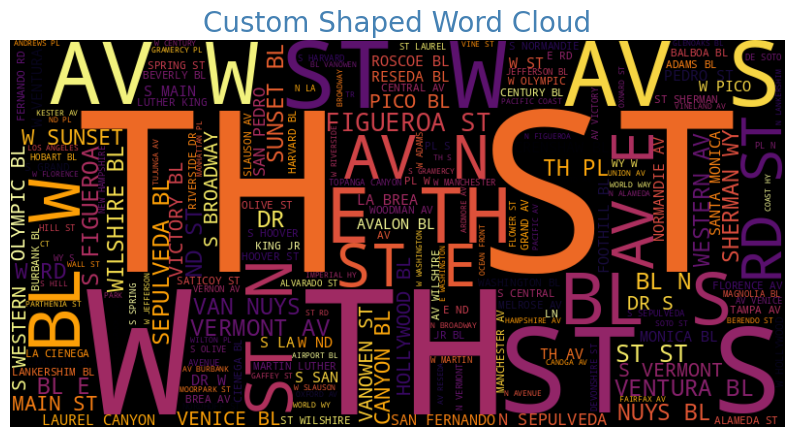

In [26]:
loc = list(train['Location'])
combined_text = " ".join(loc)

wordcloud = WordCloud(width=800, height=400, background_color='black', 
                      contour_width=3, contour_color='steelblue', colormap='inferno', 
                      max_words=200).generate(combined_text)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Custom Shaped Word Cloud', fontsize=20, color='steelblue')
plt.show()

### Insights

Visualization: The generated word cloud provides a visual summary of the most frequent locations mentioned in the dataset, with the size of each word representing its frequency.

Readability and Appeal: The use of a black background, steel blue contour, and 'inferno' colormap ensures that the word cloud is not only readable but also visually striking.

Customization: The code demonstrates how to customize various aspects of the word cloud, including size, color, and styling, to suit specific aesthetic preferences or thematic requirements.

In [27]:
train.columns

Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported',
       'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description', 'Crime_Category'],
      dtype='object')

## Latitude and Longitide

In [28]:
Lat_long = train.iloc[:,[2,3]]

In [29]:
Lat_long = train[["Latitude","Longitude"]]

In [30]:
Lat_long.describe()

,Latitude,Longitude
count,20000.000000,20000.000000
mean,33.940704,-117.893072
std,2.126810,7.377726
min,0.000000,-118.663400
25%,34.009200,-118.429700
50%,34.058700,-118.323000
75%,34.165025,-118.274400
max,34.328100,0.000000


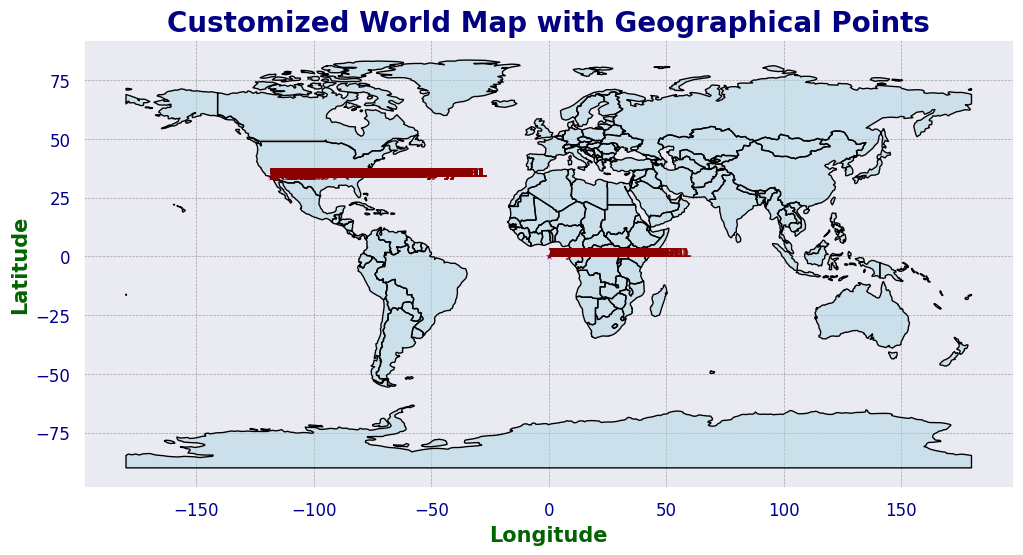

In [31]:
warnings.filterwarnings("ignore")


geometry = [Point(xy) for xy in zip(train['Longitude'], train['Latitude'])]
gdf = GeoDataFrame(train, geometry=geometry)


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


fig, ax = plt.subplots(figsize=(12, 8))


world.boundary.plot(ax=ax, linewidth=1.0, edgecolor='black')
world.plot(ax=ax, color='lightblue', alpha=0.5)


gdf.plot(ax=ax, marker='*', color='purple', markersize=50, alpha=0.7, edgecolor='white', linewidth=0.5)


plt.title('Customized World Map with Geographical Points', fontsize=20, fontweight='bold', color='navy')
plt.xlabel('Longitude', fontsize=15, fontweight='bold', color='darkgreen')
plt.ylabel('Latitude', fontsize=15, fontweight='bold', color='darkgreen')
plt.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.7)
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')


for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['Location']):
    ax.text(x, y, label, fontsize=9, color='darkred', weight='bold', alpha=0.8)


plt.show()

### Insigts
Customized Visualization:

The map uses a distinct color palette and marker style to make the geographical points stand out. Purple star-shaped markers with white edges create a visually appealing contrast against the light blue world map.
Annotations:

Adding annotations to specific points helps in identifying key locations. This is particularly useful for maps where certain locations are of interest and need to be highlighted for better understanding and context.
Enhanced Readability:

The grid lines, set in a light grey dashed style, improve readability and provide reference points for the geographical coordinates. This helps users to better locate and understand the spatial distribution of the points.
Focus on Important Details:

The use of alpha transparency for both the markers and the world map allows for layering without losing the visibility of any important details. This ensures that both the map and the points are clearly visible.
Contextual Information:

The customized title, labels, and annotation colors (navy for the title, dark green for labels, dark blue for tick labels, and dark red for annotations) provide contextual information and enhance the overall aesthetics of the map. This makes it easier for users to grasp the information being conveyed.
User-Friendly Design:

The larger marker size (50) ensures that the points are easily noticeable, even when the map is zoomed out. This is crucial for presentations and reports where the audience needs to quickly identify key data points.
Balanced Layout:

The plot's overall design is balanced and uncluttered, providing a clean and professional look. This is achieved by carefully selecting font sizes, weights, and colors, making the map suitable for both academic and business settings.

In [32]:
warnings.filterwarnings("ignore")
l = train[train['Latitude']==0].index
for i in l:
  train['Latitude'][i] = np.mean(train[train['Area_Name']==train["Area_Name"][i]]['Latitude'])
  train['Longitude'][i] = np.mean(train[train['Area_Name']==train["Area_Name"][i]]['Longitude'])

## Date_Reported, Date_Occurred and Time_Occurred

In [33]:
train['Date_Reported'] = pd.to_datetime(train['Date_Reported'])
train['Date_Occurred'] = pd.to_datetime(train['Date_Occurred'])
test['Date_Reported'] = pd.to_datetime(test['Date_Reported'])
test['Date_Occurred'] = pd.to_datetime(test['Date_Occurred'])

In [34]:
train['Reported_year'] = train['Date_Reported'].dt.year
train['Reported_month'] = train['Date_Reported'].dt.month
train['Reported_day'] = train['Date_Reported'].dt.day
test['Reported_year'] = test['Date_Reported'].dt.year
test['Reported_month'] = test['Date_Reported'].dt.month
test['Reported_day'] = test['Date_Reported'].dt.day

In [35]:
train['Occurred_year'] = train['Date_Occurred'].dt.year
train['Occurred_month'] = train['Date_Occurred'].dt.month
train['Occurred_day'] = train['Date_Occurred'].dt.day
test['Occurred_year'] = test['Date_Occurred'].dt.year
test['Occurred_month'] = test['Date_Occurred'].dt.month
test['Occurred_day'] = test['Date_Occurred'].dt.day

In [36]:
train.drop(columns=['Date_Reported','Date_Occurred'],inplace=True)
test.drop(columns=['Date_Reported','Date_Occurred'],inplace=True)

In [37]:
hour = lambda x: int(x//100)
train["Hour_Occurred"] = train['Time_Occurred'].apply(hour)
test["Hour_Occurred"] = test['Time_Occurred'].apply(hour)

In [38]:
dd = ['Reported_year', 'Reported_month', 'Reported_day', 'Occurred_year',
       'Occurred_month', 'Occurred_day', 'Hour_Occurred']
for i in dd:
    print("x-----------------------------------------------x")
    print(train[i].value_counts()/len(train)*100)

x-----------------------------------------------x
Reported_year
2020    95.885
2021     2.660
2022     0.880
2023     0.540
2024     0.035
Name: count, dtype: float64
x-----------------------------------------------x
Reported_month
1     9.120
5     8.770
2     8.630
6     8.625
7     8.450
10    8.405
9     8.315
8     8.170
3     8.125
12    7.935
11    7.745
4     7.710
Name: count, dtype: float64
x-----------------------------------------------x
Reported_day
28    3.605
4     3.550
21    3.520
16    3.490
17    3.475
5     3.440
18    3.410
24    3.345
23    3.340
10    3.300
22    3.300
6     3.290
1     3.280
25    3.270
13    3.265
11    3.230
26    3.215
14    3.195
30    3.195
9     3.190
2     3.185
20    3.185
3     3.180
8     3.155
7     3.150
27    3.145
12    3.105
29    3.080
15    3.080
19    3.005
31    1.825
Name: count, dtype: float64
x-----------------------------------------------x
Occurred_year
2020    100.0
Name: count, dtype: float64
x--------------------------

In [39]:
corr2 = train.corr(numeric_only=True)
corr2

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code,Crime_Category,Reported_year,Reported_month,Reported_day,Occurred_year,Occurred_month,Occurred_day,Hour_Occurred
Latitude,1.000000,-0.569319,0.013786,0.340363,0.338035,-0.003204,0.039880,0.014341,0.038002,-0.020292,0.015697,-0.018273,0.000395,NaN,-0.015806,0.001652,0.014392
Longitude,-0.569319,1.000000,-0.008743,-0.429333,-0.430545,0.006826,-0.082792,-0.058854,-0.047145,0.043974,-0.023587,-0.000057,0.000406,NaN,-0.003958,-0.000046,-0.009027
Time_Occurred,0.013786,-0.008743,1.000000,0.012346,0.012127,-0.028881,-0.017798,-0.057534,-0.016911,0.040296,-0.047585,-0.001129,0.016480,NaN,0.002028,0.034790,0.999614
Area_ID,0.340363,-0.429333,0.012346,1.000000,0.999024,-0.002518,0.028966,0.004045,-0.027243,-0.011417,0.016625,-0.003898,-0.009110,NaN,0.001464,-0.005369,0.012082
Reporting_District_no,0.338035,-0.430545,0.012127,0.999024,1.000000,-0.002108,0.028721,0.004121,-0.027117,-0.011914,0.016870,-0.004287,-0.009061,NaN,0.001029,-0.005534,0.011865
Part 1-2,-0.003204,0.006826,-0.028881,-0.002518,-0.002108,1.000000,0.186780,0.254579,0.419642,-0.257909,0.105070,-0.007730,0.007045,NaN,-0.010354,-0.015129,-0.030946
Victim_Age,0.039880,-0.082792,-0.017798,0.028966,0.028721,0.186780,1.000000,0.191313,0.056768,-0.030696,0.042711,-0.029217,-0.003570,NaN,-0.021737,-0.013958,-0.018670
Premise_Code,0.014341,-0.058854,-0.057534,0.004045,0.004121,0.254579,0.191313,1.000000,0.196771,-0.174398,0.125976,-0.018736,0.000817,NaN,-0.014076,-0.008401,-0.058154
Weapon_Used_Code,0.038002,-0.047145,-0.016911,-0.027243,-0.027117,0.419642,0.056768,0.196771,1.000000,0.022266,0.031902,-0.056101,-0.013781,NaN,-0.055050,-0.012782,-0.015394
Crime_Category,-0.020292,0.043974,0.040296,-0.011417,-0.011914,-0.257909,-0.030696,-0.174398,0.022266,1.000000,-0.152234,0.003235,0.000955,NaN,0.001076,0.026895,0.040184


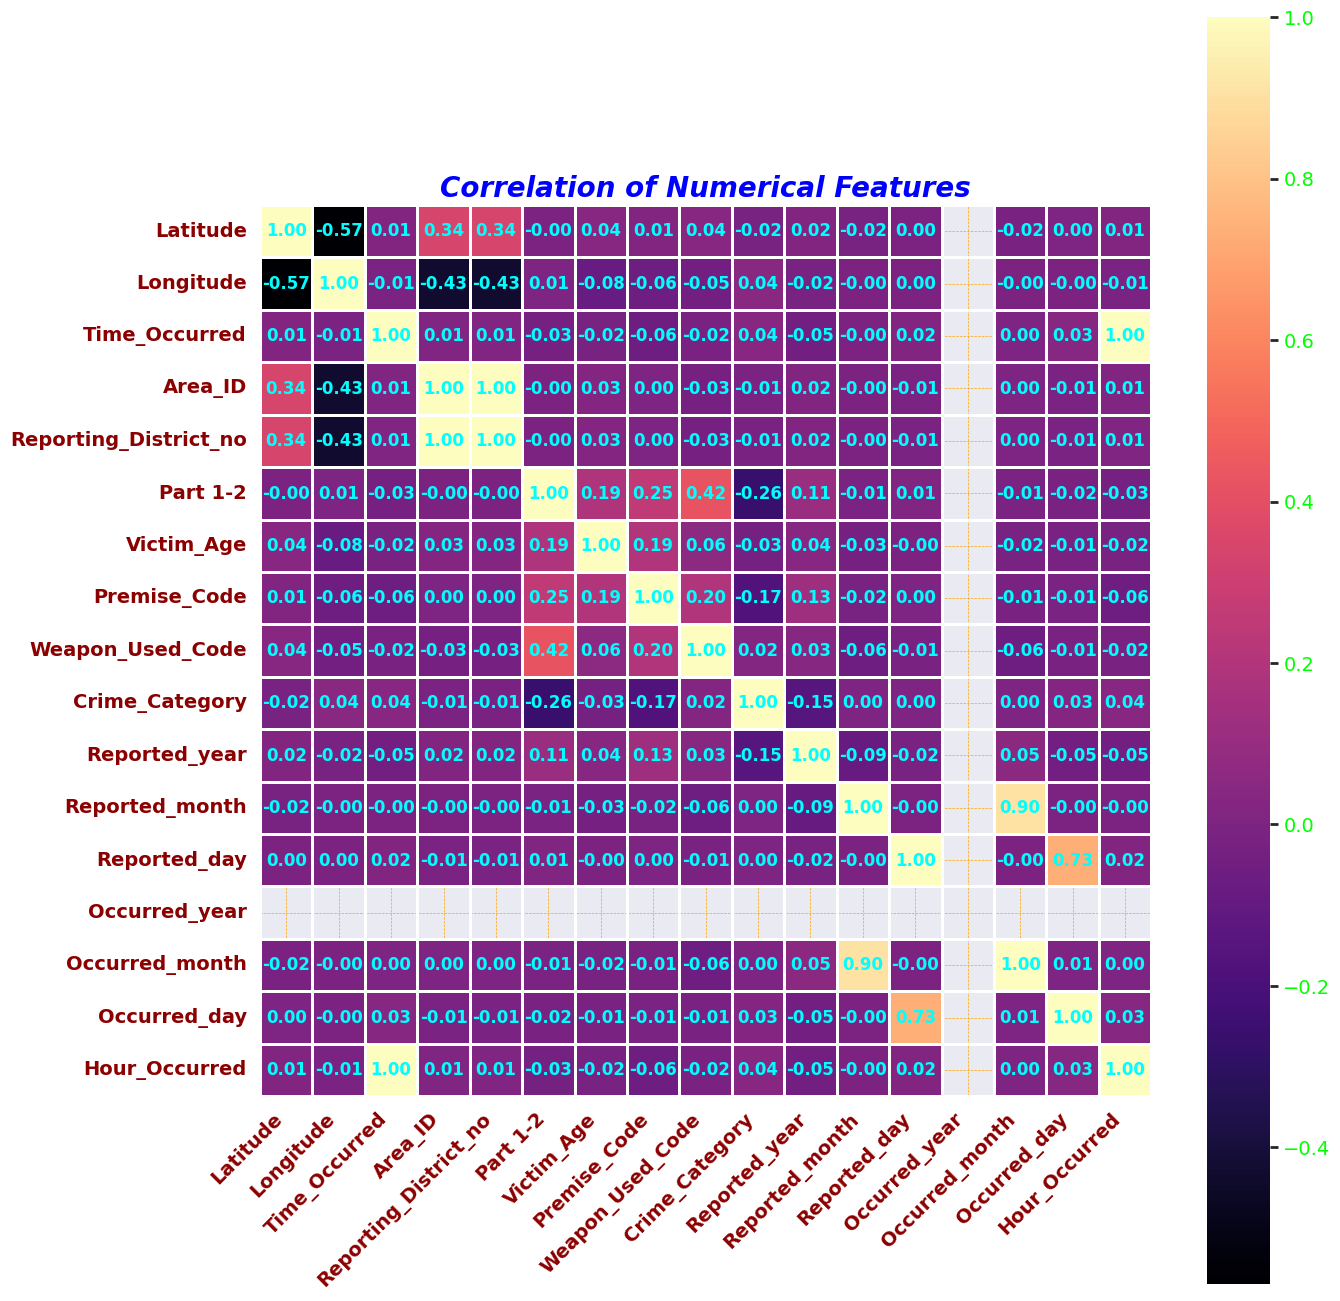

In [40]:
plt.figure(figsize=(14, 14))
sns.heatmap(corr2, 
            annot=True, 
            fmt='.2f', 
            cmap='magma',  
            cbar=True, 
            square=True,
            linewidths=1,  
            annot_kws={'size': 12, 'weight': 'bold', 'color': 'cyan'})  

cbar = plt.gcf().axes[-1]  
cbar.tick_params(labelsize=14, labelcolor='lime', width=2) 

plt.title('Correlation of Numerical Features', 
          fontsize=20, 
          fontweight='heavy', 
          color='blue', 
          style='italic')

plt.xticks(rotation=45, ha='right', fontsize=14, color='darkred', weight='bold')
plt.yticks(fontsize=14, color='darkred', weight='bold')
plt.grid(color='orange', linestyle='--', linewidth=0.5, axis='both')
plt.tight_layout()
plt.show()

### Insights
High Correlations:

Strong Positive Correlations: Features that have high positive correlation values (close to 1) are represented by darker shades in the 'magma' color palette. These features tend to increase together.
Strong Negative Correlations: Features with high negative correlation values (close to -1) are represented by lighter shades. These features tend to move in opposite directions.
Low or No Correlation:

Features with correlation values near 0 indicate little to no linear relationship. These are represented by medium shades in the color palette.
Visual Highlights:

The use of cyan annotations against the 'magma' background makes the correlation values easily readable.
The bold, dark red axis labels and the blue italicized title provide a visually distinct and clear presentation, making it easy to identify and focus on specific features.
Identifying Relationships:

By looking at the annotated values, we can quickly identify which feature pairs have the strongest linear relationships, either positive or negative.
This is crucial for tasks like feature selection, where highly correlated features might be removed to reduce redundancy.
Practical Application:

Understanding these correlations helps in better designing the model and interpreting the feature interactions.
For example, in a regression model, highly correlated features might lead to multicollinearity issues, which could affect the model's performance.

<Axes: xlabel='Reported_year', ylabel='count'>

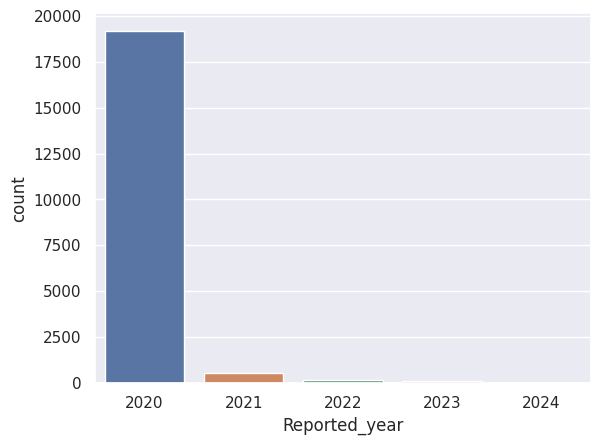

In [41]:
sns.countplot(data=train,x='Reported_year')

In [42]:
train.drop(columns=['Reported_month', 'Reported_day', 'Occurred_year',
       'Occurred_month', 'Occurred_day', 'Hour_Occurred','Time_Occurred'],inplace=True)
test.drop(columns=['Reported_month', 'Reported_day', 'Occurred_year',
       'Occurred_month', 'Occurred_day', 'Hour_Occurred','Time_Occurred'],inplace=True)

## Area Id and Area Name

In [43]:
train['Area_ID'].nunique()

21

In [44]:
train['Area_Name'].nunique()

21

In [45]:
train[train['Area_ID']==15.0]['Area_Name']

0        N Hollywood
44       N Hollywood
55       N Hollywood
92       N Hollywood
121      N Hollywood
            ...     
19873    N Hollywood
19907    N Hollywood
19916    N Hollywood
19975    N Hollywood
19990    N Hollywood
Name: Area_Name, Length: 1065, dtype: object

In [46]:
train['Area_Name'].value_counts()/len(train)*100

Area_Name
77th Street    6.725
Pacific        5.785
Central        5.780
Southwest      5.650
Southeast      5.335
N Hollywood    5.325
Hollywood      5.070
Newton         4.995
Olympic        4.800
Wilshire       4.715
Rampart        4.655
West LA        4.550
Van Nuys       4.510
Harbor         4.360
Mission        4.350
Northeast      4.195
Topanga        3.960
West Valley    3.950
Devonshire     3.845
Hollenbeck     3.775
Foothill       3.670
Name: count, dtype: float64

## Reporting District No.

In [47]:
train["Reporting_District_no"].value_counts()

Reporting_District_no
645.0     99
162.0     85
1494.0    74
1822.0    72
182.0     72
          ..
452.0      1
871.0      1
1476.0     1
848.0      1
812.0      1
Name: count, Length: 1120, dtype: int64

In [48]:
train["Reporting_District_no"].nunique()

1120

In [49]:
train.columns

Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Area_ID',
       'Area_Name', 'Reporting_District_no', 'Part 1-2', 'Modus_Operandi',
       'Victim_Age', 'Victim_Sex', 'Victim_Descent', 'Premise_Code',
       'Premise_Description', 'Weapon_Used_Code', 'Weapon_Description',
       'Status', 'Status_Description', 'Crime_Category', 'Reported_year'],
      dtype='object')

## Part 1-2 & Modus-Operandi

In [50]:
train['Part 1-2'].nunique()

2

In [51]:
train['Part 1-2'].value_counts()/len(train)*100

Part 1-2
1.0    58.185
2.0    41.815
Name: count, dtype: float64

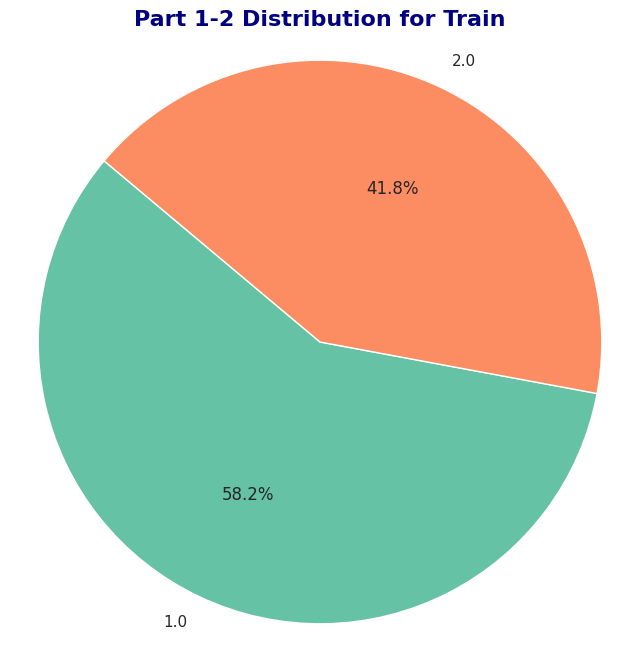

In [52]:
part1_train = train['Part 1-2'].value_counts().index
part1_count_train = train['Part 1-2'].value_counts().values
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']  # Custom color palette

plt.figure(figsize=(8, 8))
plt.pie(part1_count_train, labels=part1_train, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Part 1-2 Distribution for Train', fontsize=16, fontweight='bold', color='navy')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

### Insights

**Dominant Category**: The largest segment in the pie chart indicates the most common category within the 'Part 1-2' column of the training dataset. Identifying this dominant category can provide insight into the primary type of data present.

**Category Proportions**: The pie chart shows the proportional representation of each category in the 'Part 1-2' column. This helps in understanding how balanced or imbalanced the distribution is across different categories. For example, if one category takes up more than half of the pie, it suggests a significant skew towards that category.

**Diversity of Data**: The variety of colors and segment sizes reveal the diversity of the data. If multiple segments are nearly equal in size, it suggests a more evenly distributed dataset. Conversely, a single dominant color indicates a lack of diversity.

**Category Significance**: Smaller segments represent less common categories, which could be important for understanding the distribution of rare events or outliers in the dataset. These might require special attention during data analysis and modeling.

In [53]:
train['Modus_Operandi']

0                                           0385
1        0906 0352 0371 0446 1822 0344 0416 0417
2                                      0329 1202
3                                      0329 1300
4                  0416 0945 1822 0400 0417 0344
                          ...                   
19995                        0416 0446 2004 0913
19996                   1822 0209 0344 1414 1420
19997                             0344 1822 1420
19998              1202 2038 0913 0602 1242 0553
19999                                        NaN
Name: Modus_Operandi, Length: 20000, dtype: object

In [54]:
train['Modus_Operandi'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20000 entries, 0 to 19999
Series name: Modus_Operandi
Non-Null Count  Dtype 
--------------  ----- 
17259 non-null  object
dtypes: object(1)
memory usage: 156.4+ KB


In [55]:
train['Modus_Operandi'].value_counts()

Modus_Operandi
0344                                       826
0329                                       583
1501                                       187
0329 1300                                  135
0325                                       127
                                          ... 
1609 0329 1307 0344                          1
0344 2050 0910 2034                          1
0400 2000 0913                               1
1822 0342 0910 2049 2051 0305 0444 0344      1
1202 2038 0913 0602 1242 0553                1
Name: count, Length: 10489, dtype: int64

## Victim's Age

In [56]:
train['Victim_Age'].describe()

count    20000.000000
mean        30.135000
std         21.863645
min         -2.000000
25%         12.000000
50%         31.000000
75%         46.000000
max         99.000000
Name: Victim_Age, dtype: float64

In [57]:
test['Victim_Age'].describe()

count    5000.000000
mean       30.592000
std        21.897905
min        -2.000000
25%        14.000000
50%        31.000000
75%        46.000000
max        99.000000
Name: Victim_Age, dtype: float64

<Axes: xlabel='Victim_Age', ylabel='Density'>

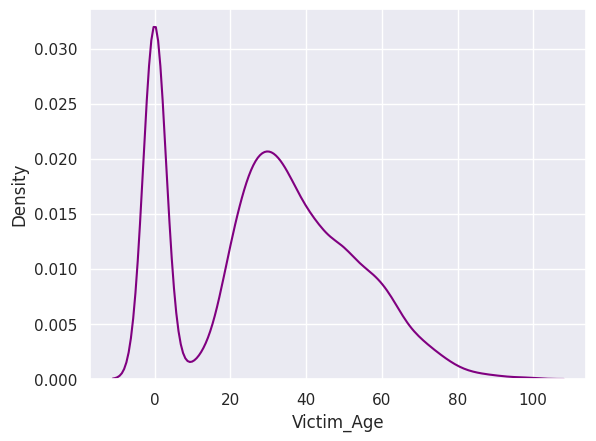

In [58]:
sns.kdeplot(x=train["Victim_Age"], color='purple')

### Insights

The KDE plot (Kernel Density Estimation plot) visualizes the distribution of the "Victim_Age" feature from the training dataset using a smoothed curve.

Age Distribution:

The plot shows the estimated probability density of victim ages.
The peak or peaks in the curve indicate where most victims' ages are concentrated.
Shape of the Curve:

The shape of the curve provides insights into the age distribution's characteristics.
For example, a single peak suggests a unimodal distribution, while multiple peaks might indicate different age groups.

In [59]:
test[test["Victim_Age"]<0]

,Location,Cross_Street,Latitude,Longitude,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Reported_year
93,BUSINESS CENTER DR,NaN,34.2313,-118.5564,17.0,Devonshire,1782.0,2.0,0935 1822 1501,-2.0,X,X,203.0,OTHER BUSINESS,NaN,NaN,IC,Invest Cont,2023
1222,W TH ST,NaN,33.9401,-118.2761,18.0,Southeast,1832.0,2.0,0913 0935,-2.0,X,X,726.0,POLICE FACILITY,NaN,NaN,IC,Invest Cont,2022
3230,WILSHIRE BL,NaN,34.0617,-118.3066,20.0,Olympic,2033.0,1.0,1822 0344,-1.0,X,X,248.0,CELL PHONE STORE,NaN,NaN,IC,Invest Cont,2022


## Victim's Sex

In [60]:
train['Victim_Sex'].unique()

array(['M', 'X', 'F', nan, 'H'], dtype=object)

In [61]:
train["Victim_Sex"].value_counts()*100/len(train)

Victim_Sex
M    42.69
F    35.88
X     8.30
H     0.01
Name: count, dtype: float64

In [62]:
test["Victim_Sex"].value_counts()*100/len(test)

Victim_Sex
M    42.42
F    36.80
X     7.90
H     0.02
Name: count, dtype: float64

## Victim's Descent

In [63]:
train['Victim_Descent'].nunique()

17

In [64]:
train['Victim_Descent'].value_counts()

Victim_Descent
H    6143
W    4245
B    2881
X    1849
O    1603
A     427
K      83
C      51
F      48
J      16
I      11
V       8
P       4
Z       3
U       2
D       1
G       1
Name: count, dtype: int64

In [65]:
train['Victim_Descent'].value_counts()/len(train)*100

Victim_Descent
H    30.715
W    21.225
B    14.405
X     9.245
O     8.015
A     2.135
K     0.415
C     0.255
F     0.240
J     0.080
I     0.055
V     0.040
P     0.020
Z     0.015
U     0.010
D     0.005
G     0.005
Name: count, dtype: float64

In [66]:
train['Victim_Descent'].value_counts()/len(test)*100

Victim_Descent
H    122.86
W     84.90
B     57.62
X     36.98
O     32.06
A      8.54
K      1.66
C      1.02
F      0.96
J      0.32
I      0.22
V      0.16
P      0.08
Z      0.06
U      0.04
D      0.02
G      0.02
Name: count, dtype: float64

## Premises Code and Description

In [67]:
train['Premise_Code'].nunique()

217

In [68]:
train['Premise_Description'].nunique()

216

In [69]:
train['Premise_Code']

0        101.0
1        216.0
2        501.0
3        101.0
4        401.0
         ...  
19995    501.0
19996    301.0
19997    102.0
19998    501.0
19999    101.0
Name: Premise_Code, Length: 20000, dtype: float64

In [70]:
train[train['Premise_Code']==501.0]['Premise_Description']

2        SINGLE FAMILY DWELLING
14       SINGLE FAMILY DWELLING
17       SINGLE FAMILY DWELLING
30       SINGLE FAMILY DWELLING
31       SINGLE FAMILY DWELLING
                  ...          
19978    SINGLE FAMILY DWELLING
19981    SINGLE FAMILY DWELLING
19982    SINGLE FAMILY DWELLING
19995    SINGLE FAMILY DWELLING
19998    SINGLE FAMILY DWELLING
Name: Premise_Description, Length: 3379, dtype: object

## Code of Weapon Used & Weapon Description

In [71]:
train['Weapon_Used_Code'].nunique()

57

In [72]:
train['Weapon_Used_Code'].value_counts()

Weapon_Used_Code
400.0    3990
500.0     789
511.0     546
102.0     388
200.0     160
109.0     154
106.0     131
207.0     125
307.0      84
512.0      80
306.0      63
212.0      55
312.0      52
304.0      51
308.0      49
205.0      45
201.0      43
114.0      41
204.0      37
302.0      37
113.0      35
101.0      34
301.0      26
310.0      26
215.0      25
223.0      24
311.0      23
219.0      23
506.0      22
107.0      18
515.0      18
218.0      17
305.0      16
221.0      14
216.0      13
103.0      12
309.0      11
112.0       8
104.0       7
514.0       7
211.0       6
513.0       4
303.0       4
510.0       3
206.0       3
508.0       2
504.0       2
105.0       2
214.0       2
503.0       1
501.0       1
202.0       1
111.0       1
210.0       1
122.0       1
115.0       1
213.0       1
Name: count, dtype: int64

In [73]:
train['Weapon_Description'].nunique()

57

In [74]:
train[train['Weapon_Used_Code']==400.0]['Weapon_Description']

1        STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
4        STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
5        STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
19       STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
31       STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
                              ...                      
19978    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
19981    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
19982    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
19984    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
19995    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
Name: Weapon_Description, Length: 3990, dtype: object

## Status & Status Description

In [75]:
train['Status'].nunique()

5

In [76]:
train['Status_Description'].nunique()

5

In [77]:
train['Status']

0        IC
1        IC
2        IC
3        IC
4        IC
         ..
19995    IC
19996    IC
19997    IC
19998    IC
19999    IC
Name: Status, Length: 20000, dtype: object

In [78]:
train[train['Status']=='IC']['Status_Description']

0        Invest Cont
1        Invest Cont
2        Invest Cont
3        Invest Cont
4        Invest Cont
            ...     
19995    Invest Cont
19996    Invest Cont
19997    Invest Cont
19998    Invest Cont
19999    Invest Cont
Name: Status_Description, Length: 15236, dtype: object

# Multivariate Analysis

**Multivariate Analysis** refers to statistical techniques used to analyze data that involves more than two variables simultaneously. It aims to understand the relationships and interactions between multiple variables, which can provide a more comprehensive view of the data than univariate or bivariate analysis.

In [79]:
train

,Location,Cross_Street,Latitude,Longitude,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category,Reported_year
0,CARPENTER AV,NaN,34.1522,-118.3910,15.0,N Hollywood,1563.0,1.0,0385,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,4,2020
1,TH ST,ALAMEDA ST,34.0028,-118.2391,13.0,Newton,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,4,2020
2,E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,13.0,Newton,1343.0,2.0,0329 1202,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,4,2020
3,ORO GRANDE ST,NaN,34.2953,-118.4590,19.0,Mission,1924.0,1.0,0329 1300,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,4,2020
4,S VERMONT AV,NaN,33.9787,-118.2918,12.0,77th Street,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,W ADAMS BL,NaN,34.0334,-118.3523,3.0,Southwest,303.0,2.0,0416 0446 2004 0913,51.0,M,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,5,2020
19996,ROSCOE BL,NaN,34.2212,-118.5011,10.0,West Valley,1008.0,1.0,1822 0209 0344 1414 1420,0.0,M,W,301.0,GAS STATION,NaN,NaN,IC,Invest Cont,4,2020
19997,S SHENANDOAH ST,NaN,34.0571,-118.3815,8.0,West LA,849.0,1.0,0344 1822 1420,42.0,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,4,2020
19998,W SEPULVEDA ST,NaN,33.7451,-118.2835,5.0,Harbor,558.0,2.0,1202 2038 0913 0602 1242 0553,76.0,F,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,1,2020


In [80]:
train['Crime_Category'] = label_e.inverse_transform(train['Crime_Category'])

## 1st Scenario

   ### How the type of crime is affected by the victim's gender?

In [81]:
train.groupby('Victim_Sex')['Crime_Category'].value_counts(normalize=True).to_frame()*100

proportion
Victim_Sex Crime_Category                           
F          Property Crimes                 42.028986
           Violent Crimes                  34.378484
           Crimes against Public Order     12.374582
           Fraud and White-Collar Crimes    8.681717
           Crimes against Persons           1.853400
           Other Crimes                     0.682832
H          Fraud and White-Collar Crimes   50.000000
           Property Crimes                 50.000000
M          Property Crimes                 55.293980
           Violent Crimes                  26.305926
           Crimes against Public Order      8.995081
           Fraud and White-Collar Crimes    7.355353
           Crimes against Persons           1.065823
           Other Crimes                     0.983837
X          Property Crimes                 80.662651
           Crimes against Public Order      9.156627
           Fraud and White-Collar Crimes    4.156627
           Violent Crimes                   3.192771
           Other Crimes                     2.771084
           Crimes against Persons           0.060241

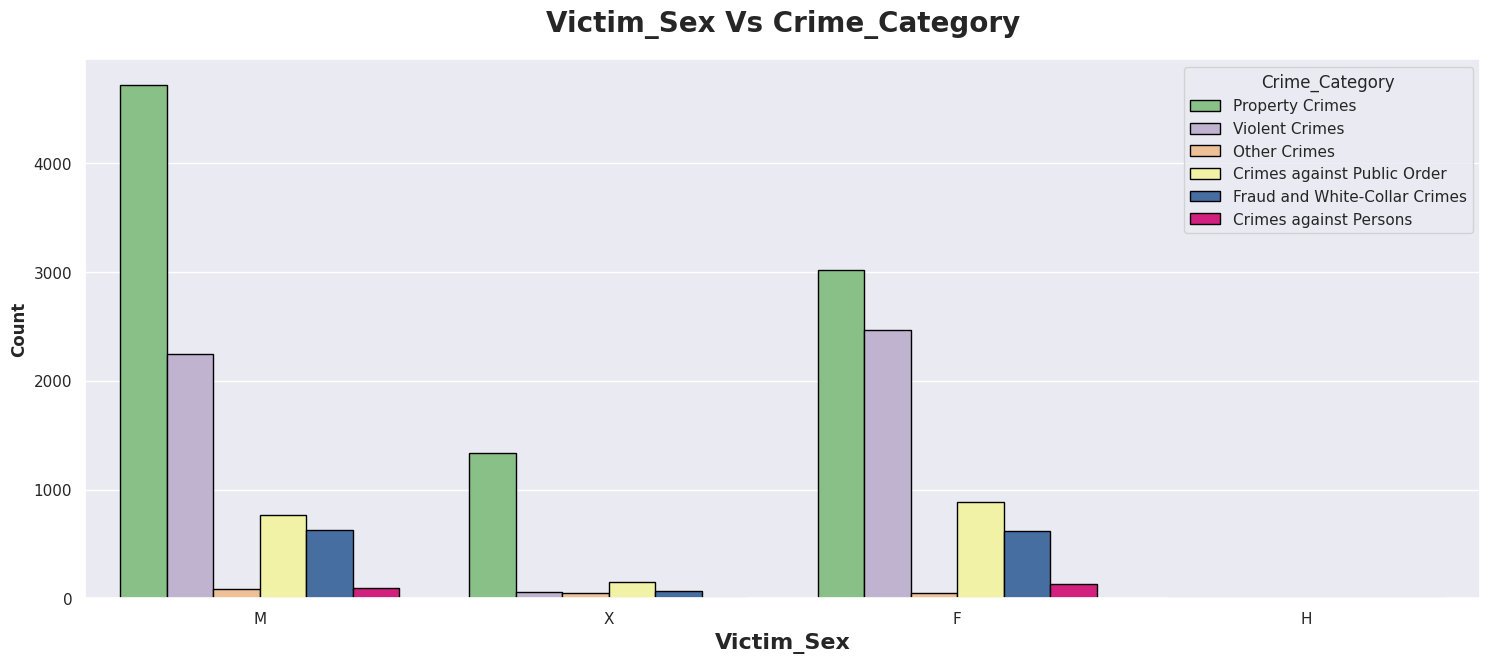

In [82]:
plt.subplots(figsize=(18, 7))
sns.countplot(x="Victim_Sex", hue="Crime_Category", data=train, ec="black", palette="Accent")
plt.title("Victim_Sex Vs Crime_Category", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Victim_Sex", weight="bold", fontsize=16)
plt.legend(title="Crime_Category", fancybox=True)
plt.show()

### Insights

**Gender Disparity**: The count of victims based on their sex can reveal significant insights into gender disparity in crime victimization. If one gender shows higher counts across multiple crime categories, it indicates that this gender is more frequently targeted.

**Crime Distribution by Gender**: Observing how different crime categories are distributed across different genders can help in identifying patterns. For instance, certain crimes might be predominantly committed against a specific gender, highlighting areas that require targeted interventions.

**High-Frequency Crimes**: The most frequent crime categories for each gender can be identified by the height of the bars. This helps in understanding the most common crimes faced by each gender, which can inform policy-making and preventive measures.

**Comparative Analysis**: The bar plot allows for a comparative analysis between different genders within the same crime category. This can highlight gender-specific vulnerabilities and provide a basis for gender-sensitive crime prevention strategies.

## 2nd Scenario

  ### How crime category if effected by status description

In [83]:
train.groupby('Status_Description')['Crime_Category'].value_counts(normalize=True).to_frame()*100

proportion
Status_Description Crime_Category                           
Adult Arrest       Violent Crimes                  40.798442
                   Property Crimes                 36.660175
                   Crimes against Public Order     15.725414
                   Crimes against Persons           3.359299
                   Fraud and White-Collar Crimes    1.850049
                   Other Crimes                     1.606621
Adult Other        Violent Crimes                  55.333077
                   Property Crimes                 21.178283
                   Crimes against Public Order     17.905275
                   Crimes against Persons           3.080477
                   Fraud and White-Collar Crimes    1.424721
                   Other Crimes                     1.078167
Invest Cont        Property Crimes                 67.734313
                   Violent Crimes                  15.981885
                   Fraud and White-Collar Crimes    8.394592
                   Crimes against Public Order      6.635600
                   Other Crimes                     0.767918
                   Crimes against Persons           0.485692
Juv Arrest         Property Crimes                 50.000000
                   Violent Crimes                  38.571429
                   Crimes against Public Order      8.571429
                   Crimes against Persons           1.428571
                   Other Crimes                     1.428571
Juv Other          Violent Crimes                  69.767442
                   Property Crimes                 18.604651
                   Crimes against Public Order      6.976744
                   Crimes against Persons           2.325581
                   Fraud and White-Collar Crimes    2.325581

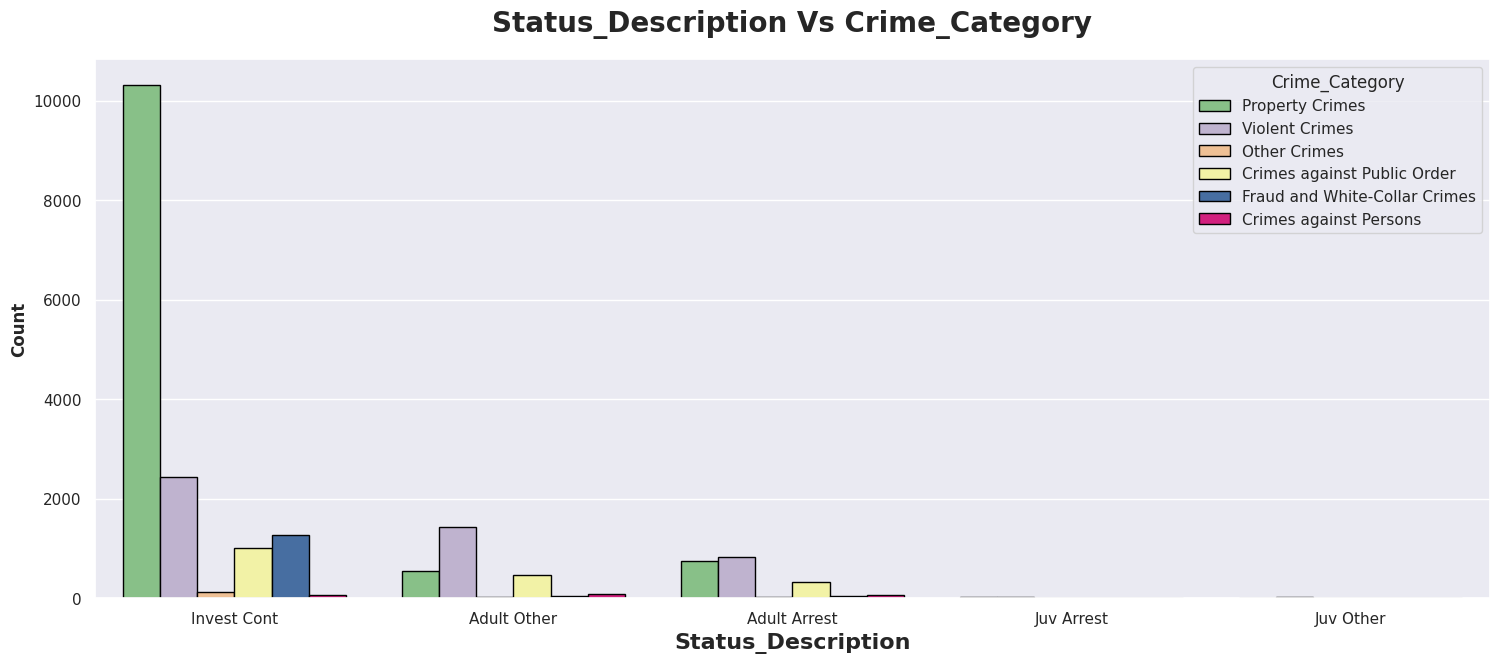

In [84]:
plt.subplots(figsize=(18, 7))
sns.countplot(x="Status_Description", hue="Crime_Category", data=train, ec="black", palette="Accent")
plt.title("Status_Description Vs Crime_Category", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Status_Description", weight="bold", fontsize=16)
plt.legend(title="Crime_Category", fancybox=True)
plt.show()

### Insights

**Status Distribution**: The plot provides a clear view of how various status descriptions are distributed across different crime categories. This can help in understanding the outcomes or current status of cases based on their categories.

**Most Common Status**: By looking at the heights of the bars, we can identify which status descriptions are most common overall and within each crime category. For instance, if "Closed" is the tallest bar for most crime categories, it indicates a high resolution rate.

**Crime Category Analysis**: Each crime category might have a different distribution of status descriptions. Analyzing these distributions can reveal patterns such as certain crimes being more likely to remain "Open" or "Pending".

**Case Resolution Rates**: The plot can show the effectiveness of case resolution across different crime categories. A high count of "Closed" cases in a particular crime category indicates effective handling, whereas a high count of "Open" or "Pending" cases might highlight areas needing improvement

## X and y

In [85]:
X,y = train.drop(columns=['Crime_Category']),train['Crime_Category']

In [86]:
X.drop(columns=['Cross_Street','Area_Name','Premise_Code','Weapon_Description','Status_Description'],inplace=True)
test.drop(columns=['Cross_Street','Area_Name','Premise_Code','Weapon_Description','Status_Description'],inplace=True)

## Imputation

### Insights

**Imputation**: The process of replacing missing values in a dataset with substituted values to allow for complete analysis. This helps in making use of the full dataset and maintaining statistical power.

**Common Imputation Techniques:-**

**Mean/Median/Mode Imputation**: Replacing missing values with the mean, median, or mode of observed values. Simple but can introduce bias.

**Forward/Backward Fill**: For time-series data, missing values are filled with the previous or next observed value.

**KNN Imputation**: Uses values from nearest neighbors to impute missing data. Preserves local data structure but is computationally intensive.

**MICE (Multivariate Imputation by Chained Equations)**: Models missing values iteratively using other features. Suitable for complex datasets.

**Regression Imputation**: Predicts missing values based on regression models using other features.
Deep Learning Imputation: Uses advanced techniques like autoencoders to learn patterns and impute missing values.

In [87]:
Col_x = X.columns
Col_t = test.columns

In [88]:
imputer = SimpleImputer(strategy='most_frequent')
X = imputer.fit_transform(X)
test = imputer.transform(test)
X = pd.DataFrame(X,columns=Col_x)
test = pd.DataFrame(test,columns=Col_t)

## Train_Test Split

In [89]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Data Preprocessing

### Insights

**Data Preprocessing**: The process of transforming raw data into a clean and organized format to improve the quality and usability of data for analysis or modeling.

**Key Steps in Data Preprocessing:-**

Data Cleaning

Data Transformation

Data Integration

Data Reduction

Data Splitting

Handling Imbalanced Data

In [90]:
col_text = ['Location','Modus_Operandi','Premise_Description']
col_num = ['Latitude','Longitude','Victim_Age']
col_cat = ['Area_ID','Reporting_District_no','Part 1-2','Victim_Sex','Victim_Descent','Weapon_Used_Code','Status','Reported_year']

In [91]:
Column_transformer = ColumnTransformer([('num',StandardScaler(),col_num),('cat',OneHotEncoder(handle_unknown='ignore'),col_cat),('text1',TfidfVectorizer(),'Location'),
                                       ('text2',TfidfVectorizer(),'Modus_Operandi'),('text3',TfidfVectorizer(),'Premise_Description')])

In [92]:
X_train_preprocessed = Column_transformer.fit_transform(x_train,y_train)
X_test_preprocessed = Column_transformer.transform(x_test)

## Feature Engineering

Feature Engineering is the process of creating, modifying, or selecting features (variables) from raw data to improve the performance and effectiveness of machine learning models. Here are the key aspects:

### PCA

Principal Component Analysis (PCA): A statistical method that converts possibly correlated features into a set of linearly uncorrelated features called principal components. These components capture the most variance in the data.


**Principal Component Analysis (PCA)** is a dimensionality reduction technique used to transform a large set of variables into a smaller one while preserving as much information as possible. Here’s a brief overview:

**Steps in PCA:-**
Standardize the Data

Compute the Covariance Matrix

Calculate Eigenvalues and Eigenvectors

Sort Eigenvalues and Eigenvectors

Transform the Data

In [93]:
Column_transformer_pca = ColumnTransformer([('num',StandardScaler(),col_num),('cat',OneHotEncoder(handle_unknown='ignore'),col_cat),('text1',TfidfVectorizer(),'Location'),
                                        ('text2',TfidfVectorizer(),'Modus_Operandi'),('text3',TfidfVectorizer(),'Premise_Description')],sparse_threshold=0)


pca_pipeline = Pipeline([('transformation',Column_transformer_pca),('pca',PCA(n_components=100)),('model_lgb',LGBMClassifier())])


pca_pipeline.fit(x_train,y_train)
pca_pipeline.score(x_test,y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029660 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 100
[LightGBM] [Info] Start training from score -4.465408
[LightGBM] [Info] Start training from score -2.391416
[LightGBM] [Info] Start training from score -2.694702
[LightGBM] [Info] Start training from score -4.731584
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516


0.90975

## Select k Best


**SelectKBest** is a feature selection technique used to select the top K features based on their statistical scores.

In [94]:
label_enc = LabelEncoder()
y_train_encoded = label_enc.fit_transform(y_train)
y_test_encoded = label_enc.transform(y_test)

In [95]:
def select_k_best_features(k_input,x_train,y_train,x_test,y_test,model):
    scores = {}
    for k in k_input:
        k_best_pipeline = Pipeline([('transformer',Column_transformer),('k_best',SelectKBest(f_regression, k=k)),('model_lgbm',model)])
        k_best_pipeline.fit(x_train,y_train)
        scores[k] = k_best_pipeline.score(x_test,y_test)
    return scores

scores = select_k_best_features([500,550,600,700,800,850,900],x_train,y_train_encoded,x_test,y_test_encoded,XGBClassifier())
scores

{500: 0.95075,
 550: 0.952,
 600: 0.95125,
 700: 0.9505,
 800: 0.9515,
 850: 0.95225,
 900: 0.952}

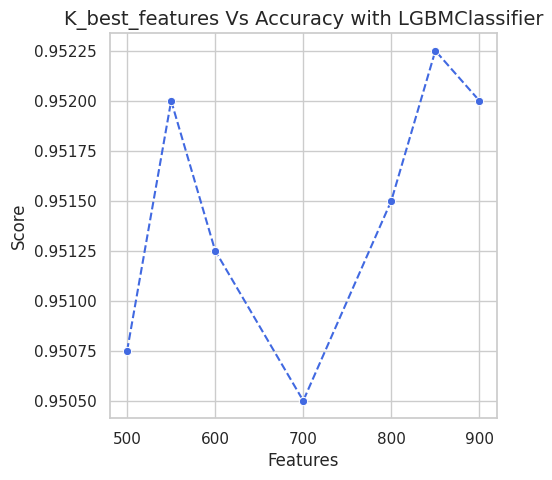

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

x = list(scores.keys())
y = list(scores.values())

sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
sns.lineplot(x=x, y=y, marker='o', color='royalblue', linestyle='--')
plt.title('K_best_features Vs Accuracy with LGBMClassifier', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.show()

## Features selection and Model Comparision

In [97]:
def feature_selection_model_compare(model_list,k_inputs,x_train,y_train,x_test,y_test):
    models_score = {}
    for model in model_list:
        scores = select_k_best_features(k_inputs,x_train,y_train,x_test,y_test,model)
        k = max(scores, key=scores.get)
        pipeline = Pipeline([('transformer',Column_transformer),('k_best',SelectKBest(f_regression, k=k)),('model',model)])
        pipeline.fit(x_train,y_train)
        models_score[model] = pipeline.score(x_test,y_test)
    return models_score

In [98]:
model_list = [LogisticRegression(),LGBMClassifier(),XGBClassifier(),DecisionTreeClassifier()]
model_score = feature_selection_model_compare(model_list,[850,900,950,1000],x_train,y_train_encoded,x_test,y_test_encoded)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10679
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 329
[LightGBM] [Info] Start training from score -4.465408
[LightGBM] [Info] Start training from score -2.391416
[LightGBM] [Info] Start training from score -2.694702
[LightGBM] [Info] Start training from score -4.731584
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10724
[LightGBM] [Info] Number of data points in the train set: 16

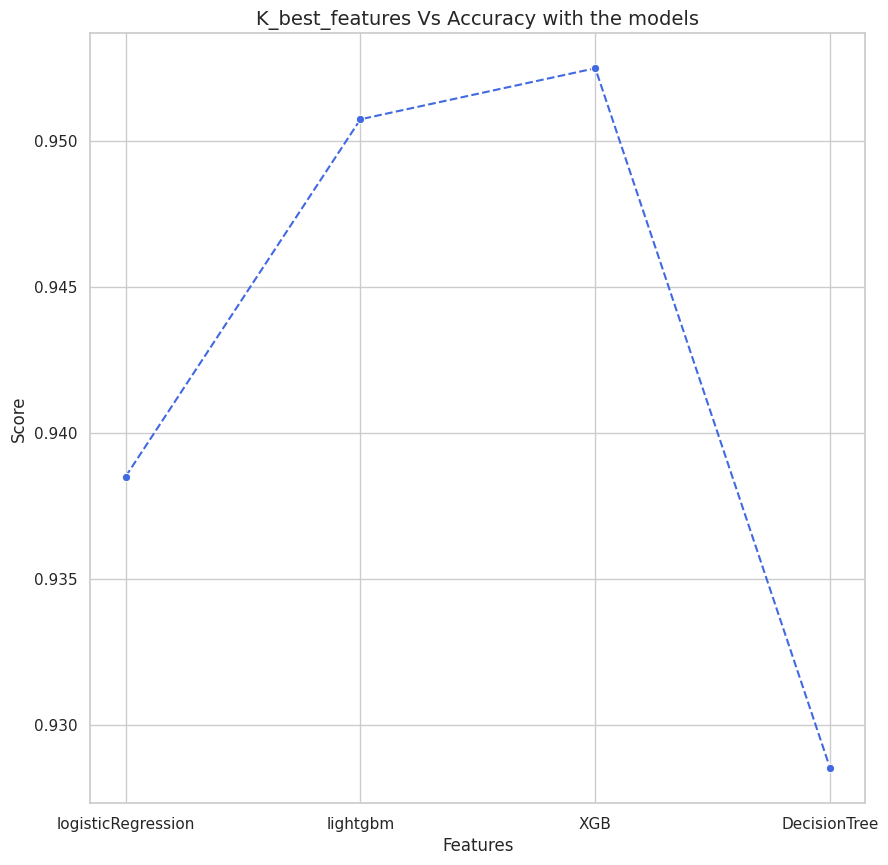

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

x = ['logisticRegression', 'lightgbm', 'XGB', 'DecisionTree']
y = list(model_score.values())

sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))
sns.lineplot(x=x, y=y, marker='o', color='royalblue', linestyle='--')
plt.title('K_best_features Vs Accuracy with the models', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.show()

## Model Training & Evaluation

## Logistic Regression


**Logistic Regression**: A regression model used to predict the probability of a binary outcome (1/0, Yes/No) or multi-class outcome. It estimates the relationship between one or more independent variables and a dependent categorical variable.

**Key Concepts:-**

**Probability Estimation**: Predicts the probability that a given input belongs to a certain class using a logistic function (sigmoid function) for binary outcomes.

**Logistic Function**: The function maps any real-valued number into the range [0, 1], which is suitable for probability estimation. For binary classification, the function is:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

where z is a linear combination of input features.

**Decision Boundary**: Determines the threshold for classification. For binary classification, a common threshold is 0.5, but it can be adjusted based on the application.

**Coefficients**: The model estimates coefficients (weights) for each feature that describe the strength and direction of the relationship between features and the target variable.

**Cost Function**: Uses the Log-Loss (Binary Cross-Entropy) function to measure the performance of the model. It penalizes incorrect classifications more heavily as the predicted probability diverges from the actual class.

 **Loss Function**: - A function that measures the error between predicted and actual values. For a model to be good, 
the loss function should appropriately penalize inaccuracies. For regression, common loss functions 
include Mean Squared Error (MSE); for classification, Cross-Entropy Loss.

In [100]:
model1 = LogisticRegression()
model1.fit(X_train_preprocessed,y_train)
model1.score(X_test_preprocessed,y_test)

0.93725

## LGBMClassifier

**LGBMC (LightGBM Classifier)**: A gradient boosting framework that uses tree-based learning algorithms. It is optimized for high performance and efficiency.

In [101]:
model2 = LGBMClassifier()
model2.fit(X_train_preprocessed,y_train)
model2.score(X_test_preprocessed,y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12880
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 780
[LightGBM] [Info] Start training from score -4.465408
[LightGBM] [Info] Start training from score -2.391416
[LightGBM] [Info] Start training from score -2.694702
[LightGBM] [Info] Start training from score -4.731584
[LightGBM] [Info] Start training from score -0.544727
[LightGBM] [Info] Start training from score -1.424516


0.94875

In [102]:
select_pipe = Pipeline([('transformer',Column_transformer),('k_best',SelectKBest(f_regression, k=850))])
X_selected_train =  select_pipe.fit_transform(x_train,y_train_encoded)
X_selected_test = select_pipe.transform(x_test)

## Decision Tree

**Decision Tree**: A model that uses a tree-like graph of decisions and their possible consequences. It splits data into subsets based on the value of input features, resulting in a tree structure with branches representing decisions and leaves representing outcomes.

In [103]:
model3 = DecisionTreeClassifier()
model3.fit(X_train_preprocessed,y_train)
model3.score(X_test_preprocessed,y_test)

0.93

## Random Forest

**Random Forest**: A machine learning algorithm that constructs multiple decision trees during training and outputs the mode (classification) or mean (regression) of the individual trees' predictions.

In [104]:
# model4 = RandomForestClassifier()
# model4.fit(X_train_preprocessed,y_train)
# model4.score(X_test_preprocessed,y_test)

## XGBoost(Extreme Gradient Boosting)

**XGBoost(Extreme Gradient Boosting)**: An optimized gradient boosting library designed to be scalable, flexible, and efficient. It combines the predictions of multiple weak learners (trees) to create a strong predictive model.

How XGBoost Works:
Initial Model:

XGBoost starts with a simple model where all predictions are the same (e.g., the average prediction value).
Calculate Residuals:

The algorithm calculates residuals, which are the differences between the actual target values and the predicted values.
Fit Weak Learner:

A new decision tree (weak learner) is trained to predict these residuals. This tree attempts to minimize the current residuals.
Update Predictions:

The predictions from the new tree are added to the existing predictions, and these updated predictions are used in the next iteration.
Repeat:

This process is repeated for a set number of iterations or until the residuals are minimized.
Final Prediction:

The final prediction is the ensemble of all the weak learners combined.

In [105]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [106]:
model5 = XGBClassifier()
model5.fit(X_train_preprocessed,y_train_encoded)
model5.score(X_test_preprocessed,y_test_encoded)

0.95375

## K-Nearest Neighbors (KNN)

**K-Nearest Neighbors (KNN)**: A supervised learning algorithm that classifies or predicts the output of a sample based on the majority vote or average of its `k` nearest neighbors in the feature space.

In [107]:
# model6 = KNeighborsClassifier()
# model6.fit(X_train_preprocessed,y_train)
# model6.score(X_test_preprocessed,y_test)


## CatBoost

**CatBoost**: A gradient boosting library developed by Yandex that is optimized for handling categorical data and provides high performance and efficiency for classification, regression, and ranking tasks.

In [108]:
# model7 = CatBoostClassifier()
# model7.fit(X_train_preprocessed,y_train)
# model7.score(X_test_preprocessed,y_test)

## Support Vector Machine (SVM)

**Support Vector Machine (SVM)**: A machine learning algorithm that finds the hyperplane that best separates classes in the feature space by maximizing the margin between them.

In [109]:
model8 = SVC()
model8.fit(X_train_preprocessed,y_train)
model8.score(X_test_preprocessed,y_test)

0.9335

## Multi-layer Perceptron Classifier (MLPClassifier)

**MLPClassifier (Multi-layer Perceptron Classifier)**: A type of feedforward artificial neural network that consists of multiple layers of nodes (neurons), where each layer is fully connected to the next layer. It is used for classification tasks by learning complex patterns in the data.

In [110]:
# model9 = MLPClassifier()
# model9.fit(X_train_preprocessed,y_train)
# model9.score(X_test_preprocessed,y_test)

# Hyper Parameter Tuning

**Hyperparameter Tuning**: The process of optimizing the hyperparameters of a machine learning model to achieve the best performance. Hyperparameters are the configuration settings used to control the training process and model structure, such as learning rate, number of layers, or number of trees.

 **Why We Need It**: Optimal hyperparameters can significantly improve a model's performance 
by finding the best balance between bias and variance. 

1. **Grid Search**: - **Description**: Exhaustively tests all combinations of hyperparameters specified in a grid. - **Pros**: Comprehensive, simple to implement. - **Cons**: Computationally expensive, especially with many hyperparameters. 
2. **Random Search**: - **Description**: Randomly samples combinations of hyperparameters within specified ranges. - **Pros**: Often faster than grid search, can find good parameters quickly. - **Cons**: May miss the optimal combination if not sampled sufficiently. 
3. **Bayesian Optimization**: - **Description**: Uses probabilistic models to predict the performance of hyperparameter 
combinations and iteratively refines the search based on past results. - **Pros**: More efficient, can handle complex hyperparameter spaces. - **Cons**: Requires additional setup and understanding. 
4. **Cross-Validation**: - **Description**: Evaluates model performance by partitioning the data into training and 
validation sets multiple times and averaging the results. - **Pros**: Provides a robust estimate of model performance. - **Cons**: Computationally expensive, especially with large datasets.

## Extreme Gradient Boosting (XGBoost)

**XGBoost (Extreme Gradient Boosting)**: This is a powerful and popular machine learning algorithm known for its performance and flexibility. Tuning its hyperparameters is crucial for achieving optimal results. Here’s a guide to hyperparameter tuning for XGBoost:

https://xgboost.readthedocs.io/en/latest/parameter.html

In [111]:
param_grid1 = {
     'learning_rate':[0.1,0.5,0.3,1],
     'max_depth':[6,10,12,15,8],
     'lambda':[1,5,10,15]
 }
param_grid1 = {
     'learning_rate':[0.5,0.3],
     'max_depth':[6,10,8],
     'lambda':[1,5,10]
 }
grid_xgb = GridSearchCV(XGBClassifier(),param_grid=param_grid1,cv=2,verbose=3,n_jobs=-1)
grid_xgb.fit(X_selected_train,y_train_encoded)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV 1/2] END lambda=1, learning_rate=0.5, max_depth=6;, score=0.946 total time=   4.4s
[CV 2/2] END lambda=1, learning_rate=0.5, max_depth=6;, score=0.948 total time=   4.4s
[CV 1/2] END lambda=1, learning_rate=0.5, max_depth=10;, score=0.942 total time=   6.2s
[CV 2/2] END lambda=1, learning_rate=0.5, max_depth=10;, score=0.945 total time=   6.2s
[CV 1/2] END lambda=1, learning_rate=0.5, max_depth=8;, score=0.945 total time=   5.5s
[CV 2/2] END lambda=1, learning_rate=0.5, max_depth=8;, score=0.946 total time=   5.5s
[CV 1/2] END lambda=1, learning_rate=0.3, max_depth=6;, score=0.946 total time=   4.7s
[CV 2/2] END lambda=1, learning_rate=0.3, max_depth=6;, score=0.950 total time=   4.7s
[CV 1/2] END lambda=1, learning_rate=0.3, max_depth=10;, score=0.945 total time=   7.6s
[CV 2/2] END lambda=1, learning_rate=0.3, max_depth=10;, score=0.947 total time=   7.5s
[CV 1/2] END lambda=1, learning_rate=0.3, max_depth=8;, score=0.9

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'lambda': [1, 5, 10], 'learning_rate': [0.5, 0.3],
                         'max_depth': [6, 10, 8]},
             verbose=3)

In [112]:
grid_xgb.best_params_

{'lambda': 10, 'learning_rate': 0.3, 'max_depth': 10}

In [113]:
grid_xgb.best_score_

0.9478125

## Logistic Regression Tuning (LR Tuning)


**Logistic Regression (LR)**: This is a widely used classification algorithm, and tuning its hyperparameters can help improve model performance. Unlike more complex models, Logistic Regression has relatively few hyperparameters, but optimizing them is still crucial for achieving the best results.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [114]:
param_grid2 = {
     'penalty':['l1','l2'],
     'solver':['lbfgs','saga'],
     'C':[1,10,100]
 }
grid_lr = GridSearchCV(LogisticRegression(),param_grid=param_grid2,cv=2,verbose=3,n_jobs=-1)
grid_lr.fit(X_selected_train,y_train_encoded)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV 1/2] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/2] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/2] END ......C=1, penalty=l1, solver=saga;, score=0.941 total time=   3.1s
[CV 2/2] END ......C=1, penalty=l1, solver=saga;, score=0.936 total time=   3.0s
[CV 1/2] END .....C=1, penalty=l2, solver=lbfgs;, score=0.936 total time=   0.5s
[CV 2/2] END .....C=1, penalty=l2, solver=lbfgs;, score=0.934 total time=   0.4s
[CV 1/2] END ......C=1, penalty=l2, solver=saga;, score=0.937 total time=   0.9s
[CV 2/2] END ......C=1, penalty=l2, solver=saga;, score=0.934 total time=   0.9s
[CV 1/2] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/2] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/2] END .....C=10, penalty=l1, solver=saga;, score=0.939 total time=  10.9s
[CV 2/2] END .....C=10, penalty=l1, solver=saga;

GridSearchCV(cv=2, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'saga']},
             verbose=3)

In [115]:
grid_lr.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

## Decision Tree (DT) Tuning

**Decision Tree (DT) Tuning**: This involves optimizing the hyperparameters of the Decision Tree model to improve its performance and prevent overfitting. Here’s a guide to the key hyperparameters and tuning strategies for Decision Trees:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#decisiontreeclassifier


In [116]:
param_grid3 = {
     'min_samples_split' :[2,5,10],
     'min_samples_leaf':[1,5,10],
     'criterion':['gini', 'entropy', 'log_loss']
 }
grid_dt = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid3,cv=2,verbose=3,n_jobs=-1)
grid_dt.fit(X_selected_train,y_train_encoded)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV 1/2] END criterion=gini, min_samples_leaf=1, min_samples_split=2;, score=0.919 total time=   0.3s
[CV 2/2] END criterion=gini, min_samples_leaf=1, min_samples_split=2;, score=0.922 total time=   0.3s
[CV 1/2] END criterion=gini, min_samples_leaf=1, min_samples_split=5;, score=0.918 total time=   0.2s
[CV 2/2] END criterion=gini, min_samples_leaf=1, min_samples_split=5;, score=0.922 total time=   0.3s
[CV 1/2] END criterion=gini, min_samples_leaf=1, min_samples_split=10;, score=0.916 total time=   0.2s
[CV 2/2] END criterion=gini, min_samples_leaf=1, min_samples_split=10;, score=0.920 total time=   0.3s
[CV 1/2] END criterion=gini, min_samples_leaf=5, min_samples_split=2;, score=0.912 total time=   0.2s
[CV 2/2] END criterion=gini, min_samples_leaf=5, min_samples_split=2;, score=0.916 total time=   0.2s
[CV 1/2] END criterion=gini, min_samples_leaf=5, min_samples_split=5;, score=0.911 total time=   0.2s
[CV 2/2] END criter

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             verbose=3)

In [117]:
grid_dt.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2}

# Final Model


**Final Model** refers to the final version of a machine learning model that has been optimized and validated for a specific task. It represents the culmination of the model development process, including data preprocessing, feature selection, model selection, hyperparameter tuning, and evaluation.

In [118]:
label_encd3 = LabelEncoder()
y_encoded = label_encd3.fit_transform(y)

In [119]:
X_final_train = select_pipe.fit_transform(X,y_encoded)
X_final_test = select_pipe.transform(test)

ValueError: Found input variables with inconsistent numbers of samples: [20000, 4]

In [ ]:
final_model = XGBClassifier(learning_rate=0.3,max_depth=10)
final_model.fit(X_final_train,y_encoded)
y_pred = label_encd3.inverse_transform(final_model.predict(X_final_test))

# Submission

In [ ]:
submission = pd.DataFrame(columns = ["ID","Crime_Category"])
submission["ID"] = [i for i in range(1,len(y_pred)+1)]
submission["Crime_Category"] = y_pred
submission.to_csv('submission.csv',index=False)